# analyze natural gas price data and build a model

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing Data Set

In [2]:
df_gas = pd.read_csv('Nat_Gas.csv')
# Let's see what the data looks like
print("First few rows:")
print(df_gas.head())

First few rows:
      Dates  Prices
0  10/31/20    10.1
1  11/30/20    10.3
2  12/31/20    11.0
3   1/31/21    10.9
4   2/28/21    10.9


In [3]:
print("\nData shape (rows, columns):")
print(df_gas.shape)

print("\nData types:")
print(df_gas.dtypes)


Data shape (rows, columns):
(48, 2)

Data types:
Dates      object
Prices    float64
dtype: object


In [4]:
# Convert Dates column to datetime
df_gas['Dates'] = pd.to_datetime(df_gas['Dates'], format='%m/%d/%y')
# Convert Prices to float (normal numbers)
df_gas['Prices'] = df_gas['Prices'].astype(float)

In [5]:
# Let's see the cleaned data
print("After conversion:")
print(df_gas.head(10))
print("\nData types now:")
print(df_gas.dtypes)

After conversion:
       Dates  Prices
0 2020-10-31   10.10
1 2020-11-30   10.30
2 2020-12-31   11.00
3 2021-01-31   10.90
4 2021-02-28   10.90
5 2021-03-31   10.90
6 2021-04-30   10.40
7 2021-05-31    9.84
8 2021-06-30   10.00
9 2021-07-31   10.10

Data types now:
Dates     datetime64[ns]
Prices           float64
dtype: object


## Data Exploration

In [6]:
# Sort data by date (just to be sure)
df_gas = df_gas.sort_values('Dates').reset_index(drop=True)

print("Dataset Information:")
print(f"Total data points: {len(df_gas)}")
print(f"Date range: {df_gas['Dates'].min()} to {df_gas['Dates'].max()}")
print()

Dataset Information:
Total data points: 48
Date range: 2020-10-31 00:00:00 to 2024-09-30 00:00:00



In [7]:
# Statistical summary
print("Price Statistics:")
print(df_gas['Prices'].describe())
print()

Price Statistics:
count    48.000000
mean     11.207083
std       0.757897
min       9.840000
25%      10.650000
50%      11.300000
75%      11.625000
max      12.800000
Name: Prices, dtype: float64



In [8]:
# Check for missing values
print("Missing values:")
print(df_gas.isnull().sum())

Missing values:
Dates     0
Prices    0
dtype: int64


## Visualize the Data

### Seasonal Pattern

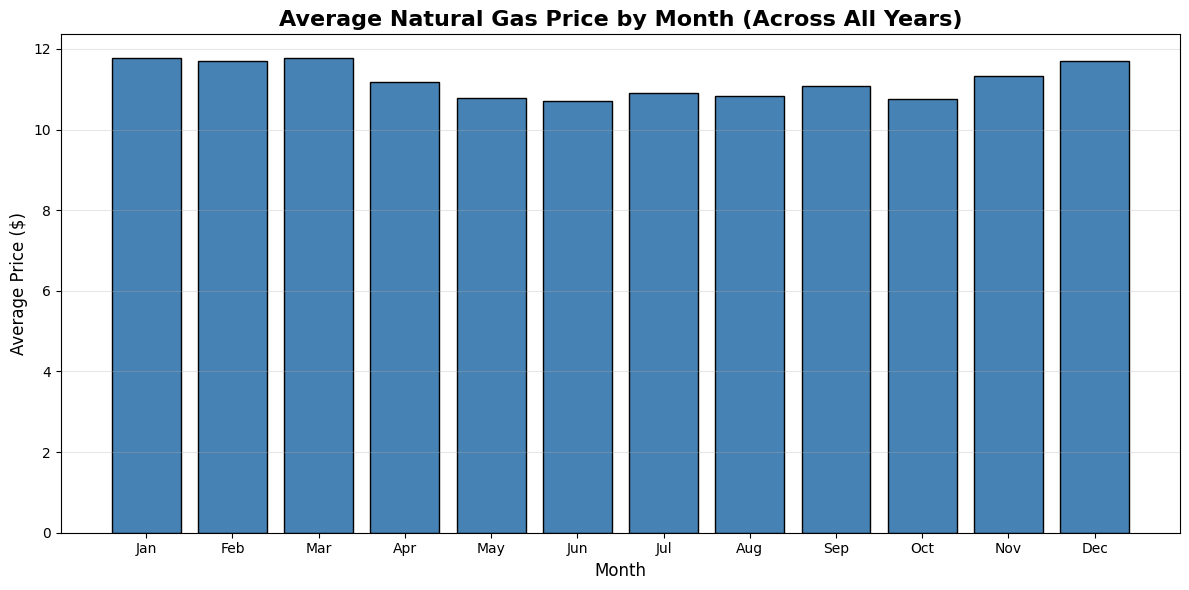

Monthly Average Prices:
    Month  Prices
0       1  11.775
1       2  11.700
2       3  11.775
3       4  11.175
4       5  10.785
5       6  10.700
6       7  10.900
7       8  10.825
8       9  11.075
9      10  10.750
10     11  11.325
11     12  11.700


In [12]:
import matplotlib.pyplot as plt
# Extract month from dates
df_gas['Month'] = df_gas['Dates'].dt.month
df_gas['Month_Name'] = df_gas['Dates'].dt.strftime('%b')  # Short month names

# Calculate average price for each month across all years
monthly_avg = df_gas.groupby('Month')['Prices'].mean().reset_index()

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(range(1, 13), monthly_avg['Prices'], color='steelblue', edgecolor='black')
plt.title('Average Natural Gas Price by Month (Across All Years)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Print the values
print("Monthly Average Prices:")
print(monthly_avg)

### the distribution of prices

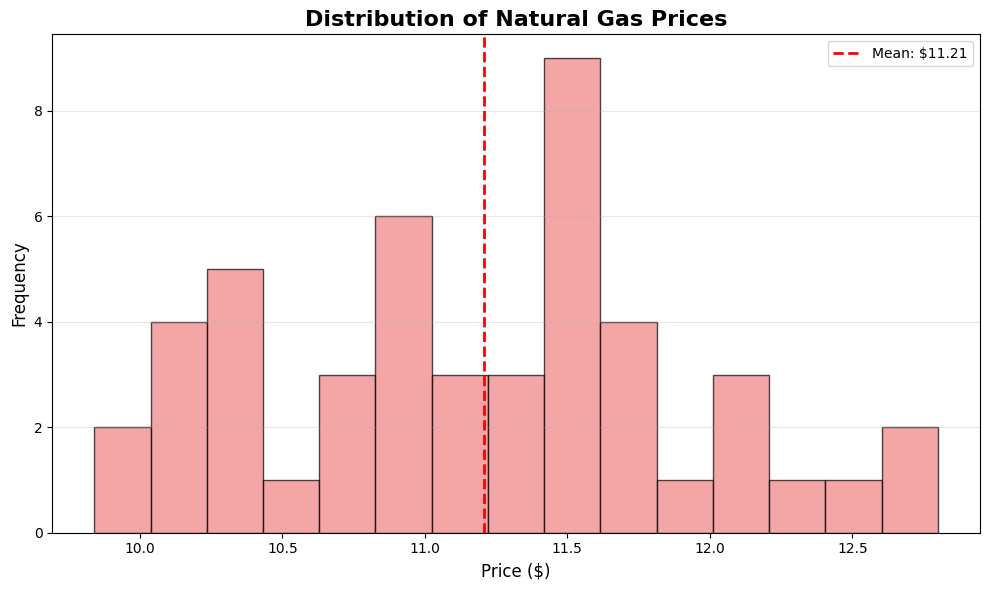

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(df_gas['Prices'], bins=15, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Distribution of Natural Gas Prices', fontsize=16, fontweight='bold')
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(df_gas['Prices'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df_gas["Prices"].mean():.2f}')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## Feature  Engineering

In [17]:
# Create new features from the date
df_gas['Year'] = df_gas['Dates'].dt.year
df_gas['Month'] = df_gas['Dates'].dt.month
df_gas['Day'] = df_gas['Dates'].dt.day

In [19]:
# Create a numerical time feature (days since start)
df_gas['Days_Since_Start'] = (df_gas['Dates'] - df_gas['Dates'].min()).dt.days

In [20]:
# Create seasonal indicators (we discovered this pattern!)
# 1 = High season (Nov-Apr), 0 = Low season (May-Oct)
df_gas['Is_High_Season'] = df_gas['Month'].apply(lambda x: 1 if x in [11, 12, 1, 2, 3, 4] else 0)


In [22]:
# Let's see our enhanced dataset
print("Enhanced Dataset with New Features:")
print(df_gas.head(10))
print()
print(df_gas.tail(10))

Enhanced Dataset with New Features:
       Dates  Prices  Year  Month Month_Name  Day  Days_Since_Start  \
0 2020-10-31   10.10  2020     10        Oct   31                 0   
1 2020-11-30   10.30  2020     11        Nov   30                30   
2 2020-12-31   11.00  2020     12        Dec   31                61   
3 2021-01-31   10.90  2021      1        Jan   31                92   
4 2021-02-28   10.90  2021      2        Feb   28               120   
5 2021-03-31   10.90  2021      3        Mar   31               151   
6 2021-04-30   10.40  2021      4        Apr   30               181   
7 2021-05-31    9.84  2021      5        May   31               212   
8 2021-06-30   10.00  2021      6        Jun   30               242   
9 2021-07-31   10.10  2021      7        Jul   31               273   

   Is_High_Season  
0               0  
1               1  
2               1  
3               1  
4               1  
5               1  
6               1  
7               0  
8 

## Building the Prediction Model

### Model Strategy: seasonal pattern + time trend ,
     Linear Regression with polynomial features (to capture trends)
    Seasonal component (the winter/summer pattern you discovered)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
# Features for prediction
X = df_gas[['Days_Since_Start', 'Month', 'Is_High_Season']]
y = df_gas['Prices']

In [25]:
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training data: {len(X_train)} points")
print(f"Testing data: {len(X_test)} points")

Training data: 38 points
Testing data: 10 points


### train a simple Linear Regression model

In [26]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [28]:
print("Model Performance:")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print()
print("What this means:")
print(f"- On average, predictions are off by ±${rmse:.2f}")
print(f"- Model explains {r2*100:.2f}% of price variation")

Model Performance:
Root Mean Squared Error (RMSE): $0.21
R² Score: 0.9069

What this means:
- On average, predictions are off by ±$0.21
- Model explains 90.69% of price variation


### Visualize How Well Our Model Predicts

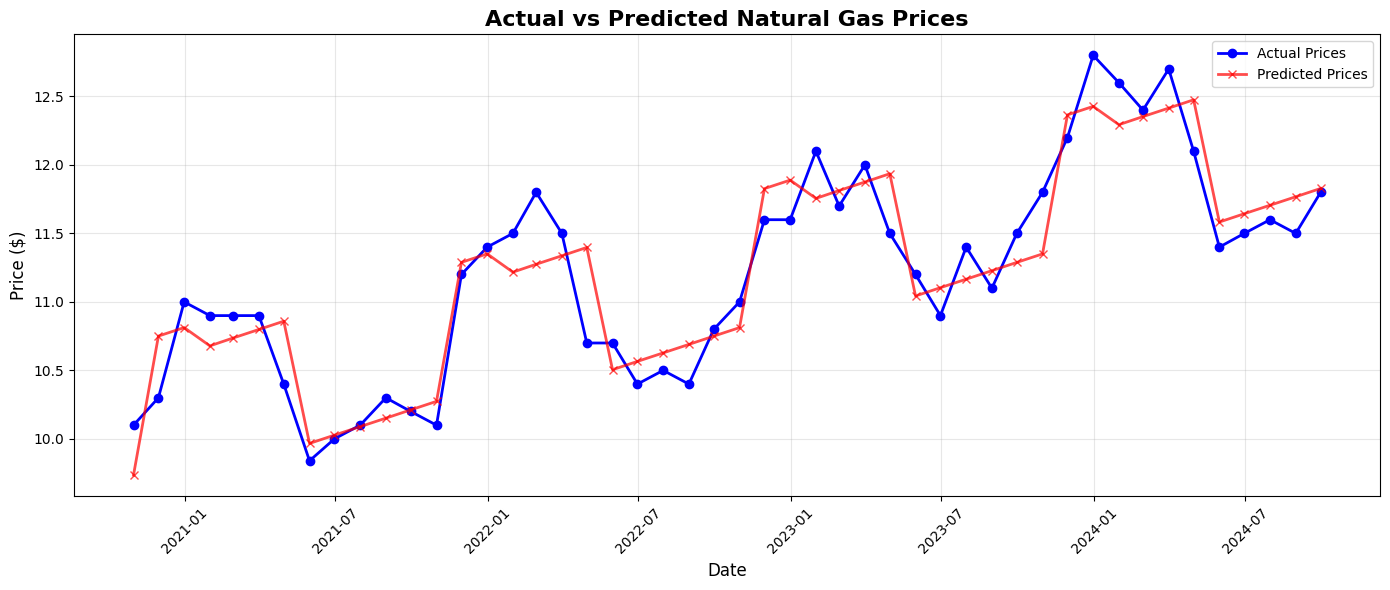

In [29]:
# Predict on all data for visualization
all_predictions = model.predict(X)

# Plot actual vs predicted
plt.figure(figsize=(14, 6))
plt.plot(df_gas['Dates'], df_gas['Prices'], marker='o', label='Actual Prices', color='blue', linewidth=2)
plt.plot(df_gas['Dates'], all_predictions, marker='x', label='Predicted Prices', color='red', linewidth=2, alpha=0.7)
plt.title('Actual vs Predicted Natural Gas Prices', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Create the Price Prediction Function

### Prediction Function

In [35]:
from datetime import datetime

def predict_gas_price(input_date):
  #Predict natural gas price for any given date
  #Parameters:  input_date: string in format 'YYYY-MM-DD' or 'MM/DD/YYYY'
  # Returns: Predicted price as float

 # Convert input string to datetime
    if isinstance(input_date, str):
        try:
            date_obj = pd.to_datetime(input_date)
        except:
            return "Error: Invalid date format. Use 'YYYY-MM-DD' or 'MM/DD/YYYY'"
    else:
        date_obj = input_date

    # Extract features (same as we used for training)
    month = date_obj.month
    days_since_start = (date_obj - df_gas['Dates'].min()).days
    is_high_season = 1 if month in [11, 12, 1, 2, 3, 4] else 0

    # Create feature array
    features = np.array([[days_since_start, month, is_high_season]])

    # Predict price
    predicted_price = model.predict(features)[0]

    return predicted_price

#### Test Some function with some dates

In [36]:
print("=" * 60)
print("TESTING THE PREDICTION FUNCTION")
print("=" * 60)

TESTING THE PREDICTION FUNCTION


####  Test 1: A date from our dataset (should match closely)

In [37]:

test_date_1 = "2023-01-31"
price_1 = predict_gas_price(test_date_1)
actual_1 = df_gas[df_gas['Dates'] == test_date_1]['Prices'].values[0]
print(f"\nTest 1 - Historical Date: {test_date_1}")
print(f"Predicted: ${price_1:.2f}")
print(f"Actual: ${actual_1:.2f}")
print(f"Difference: ${abs(price_1 - actual_1):.2f}")


Test 1 - Historical Date: 2023-01-31
Predicted: $11.76
Actual: $12.10
Difference: $0.34


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### # Test 2: Another historical date

In [39]:

test_date_2 = "2024-07-31"
price_2 = predict_gas_price(test_date_2)
actual_2 = df_gas[df_gas['Dates'] == test_date_2]['Prices'].values[0]
print(f"\nTest 2 - Historical Date: {test_date_2}")
print(f"Predicted: ${price_2:.2f}")
print(f"Actual: ${actual_2:.2f}")
print(f"Difference: ${abs(price_2 - actual_2):.2f}")


Test 2 - Historical Date: 2024-07-31
Predicted: $11.71
Actual: $11.60
Difference: $0.11


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


####  Test 3: A FUTURE date (extrapolation!)

In [40]:
test_date_3 = "2025-01-31"
price_3 = predict_gas_price(test_date_3)
print(f"\nTest 3 - Future Date: {test_date_3}")
print(f"Predicted: ${price_3:.2f}")
print("(This is extrapolation - no actual data to compare)")



Test 3 - Future Date: 2025-01-31
Predicted: $12.83
(This is extrapolation - no actual data to compare)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### Test 4: Another future date

In [41]:
test_date_4 = "2025-06-30"
price_4 = predict_gas_price(test_date_4)
print(f"\nTest 4 - Future Date: {test_date_4}")
print(f"Predicted: ${price_4:.2f}")

print("\n" + "=" * 60)


Test 4 - Future Date: 2025-06-30
Predicted: $12.18



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
